In [1]:
install.packages("Ecdat") # Se necessário

also installing the dependencies ‘misc3d’, ‘locfit’, ‘ash’, ‘FNN’, ‘kernlab’, ‘mclust’, ‘multicool’, ‘plot3D’, ‘hdrcde’, ‘ks’, ‘rainbow’, ‘DEoptimR’, ‘pcaPP’, ‘fds’, ‘bitops’, ‘leaps’, ‘robustbase’, ‘inline’, ‘rrcov’, ‘fda’, ‘RCurl’, ‘XML’, ‘tis’, ‘jpeg’, ‘TeachingDemos’, ‘BMA’, ‘mvtnorm’, ‘Ecfun’

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


In [4]:
library(Ecdat) # Carrega pacote Ecdat

In [6]:
data(Airq) # Carregando banco de dados do pacote

In [7]:
names(Airq) # exibe os nomes das variáveis do banco

[1] "airq" "vala" "rain" "coas" "dens" "medi"

In [11]:
print(Airq)

   airq    vala  rain coas     dens  medi
1   104  2734.4 12.63  yes  1815.86  4397
2    85  2479.2 47.14  yes   804.86  5667
3   127  4845.0 42.77  yes  1907.86 15817
4   145 19733.8 33.18   no  1876.08 32698
5    84  4093.6 34.55  yes   340.93  6250
6   135  1849.8 14.81   no   335.52  4705
7    88  4179.4 45.94  yes   315.78  7165
8   118  2525.3 39.25   no   360.39  4472
9    74  1899.2 42.36  yes 12957.50  2658
10  104 15257.1 12.63  yes  1728.19 33885
11   64  1219.0 59.76  yes   620.96  5160
12   75   992.9 53.90  yes   529.62  3738
13  131 15120.8 42.37  yes  5397.47 59460
14  129  9189.9 42.48  yes  1356.04 19224
15   84  1596.9 37.18  yes   276.44  3944
16  165  4157.3 36.14  yes   787.47  9281
17   80  1185.2 12.63  yes   318.63  5012
18   59  3817.7 18.69  yes  1255.04 15710
19  110  1686.2 35.35   no   750.28  2509
20  120  1322.0 35.08  yes   325.36  2627
21  118  3476.2 43.05  yes   916.78  8019
22  120  1123.8 68.13  yes   271.59  2425
23  120  1151.6 35.35   no   645.8

In [10]:
head(Airq)

airq,vala,rain,coas,dens,medi
104,2734.4,12.63,yes,1815.86,4397
85,2479.2,47.14,yes,804.86,5667
127,4845.0,42.77,yes,1907.86,15817
145,19733.8,33.18,no,1876.08,32698
84,4093.6,34.55,yes,340.93,6250
135,1849.8,14.81,no,335.52,4705


# Descrição das variáveis

> Airq: indice de qualidade do ar (quanto menor, melhor)

> vala: valor das empresas nas cidades (MIlhares de dólares)

> rain: quantidade de chuva (em polegadas)

> coas: posição costeira da cidade (sim ou não)

> dens: densidade populacional (milha quadrada)

> medi: renda média per capita (dólares)

## Análise descritiva ou exploratória

In [17]:
summary(Airq) # sumário das variáveis
# As variáveis podem ser continuas ou categóricas (divididas em categoricas)
# a variável resposta é a qualidade do ar (airq)

      airq            vala              rain        coas         dens        
 Min.   : 59.0   Min.   :  992.9   Min.   :12.63   no : 9   Min.   :  271.6  
 1st Qu.: 81.0   1st Qu.: 1535.8   1st Qu.:31.02   yes:21   1st Qu.:  365.2  
 Median :114.0   Median : 2629.8   Median :36.66            Median :  796.2  
 Mean   :104.7   Mean   : 4188.5   Mean   :36.08            Mean   : 1728.6  
 3rd Qu.:126.2   3rd Qu.: 4141.4   3rd Qu.:42.70            3rd Qu.: 1635.2  
 Max.   :165.0   Max.   :19733.8   Max.   :68.13            Max.   :12957.5  
      medi      
 Min.   :  853  
 1st Qu.: 3340  
 Median : 4858  
 Mean   : 9477  
 3rd Qu.: 8715  
 Max.   :59460  

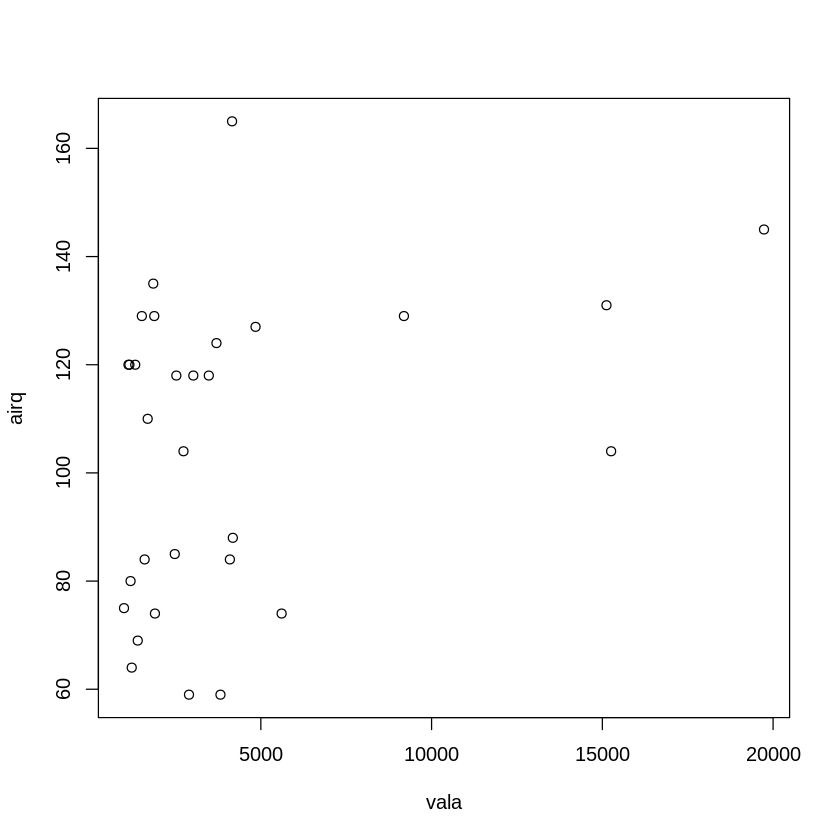

In [18]:
plot(airq~vala, data=Airq)

### Criando um modelo estatístico

y (resposta) ~ (em função de) x (explicativa)
Exemplo: y (crescimento da planta) ~ x (quantidade de adubo)
y ~ x1 + x2 + x3 + xn
Exemplo: y (crescimento da planta) ~ x1 (quantidade de adubo) + x2 (quantidade de lux)
airq ~ vala + coas + rain 

### Montando o modelo

In [22]:
m1 <- lm(airq~vala, data=Airq) # lm (modelo linear)
# alguns dados podem não ser lineares
print(m1)


Call:
lm(formula = airq ~ vala, data = Airq)

Coefficients:
(Intercept)         vala  
  96.451419     0.001969  



In [30]:
summary(m1) # para saber a significância do modelo
# p-valor indica a significãncia do modelo ou da variável
# se p-valor < 0.05 a variável é significativa
# se p-valor for maior que 0.05 não existe o efeito esperado


Call:
lm(formula = airq ~ vala, data = Airq)

Residuals:
    Min      1Q  Median      3Q     Max 
-44.970 -22.002   7.228  20.774  60.361 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 96.451419   6.691801  14.413 1.76e-14 ***
vala         0.001969   0.001082   1.821   0.0794 .  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 26.97 on 28 degrees of freedom
Multiple R-squared:  0.1058,	Adjusted R-squared:  0.07391 
F-statistic: 3.314 on 1 and 28 DF,  p-value: 0.07938


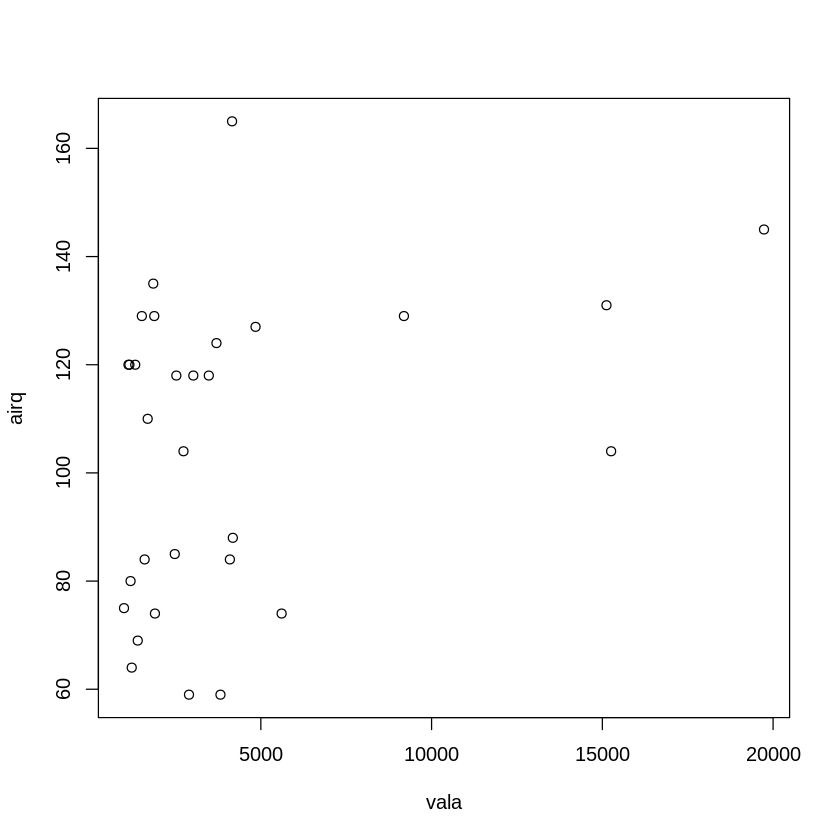

In [31]:
plot(airq~vala, data=Airq)

A variável "vala" não influencia a qualidade do ar nas cidades ("airq")

In [26]:
m2<-lm(airq~coas, data=Airq)

In [29]:
summary(m2)


Call:
lm(formula = airq ~ coas, data = Airq)

Residuals:
    Min      1Q  Median      3Q     Max 
-36.857 -15.726  -6.333  17.167  69.143 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  125.333      8.288  15.123 5.32e-15 ***
coasyes      -29.476      9.906  -2.976  0.00596 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 24.86 on 28 degrees of freedom
Multiple R-squared:  0.2403,	Adjusted R-squared:  0.2131 
F-statistic: 8.855 on 1 and 28 DF,  p-value: 0.005965


A variável "coas" influencia na qualidade do ar (airq)

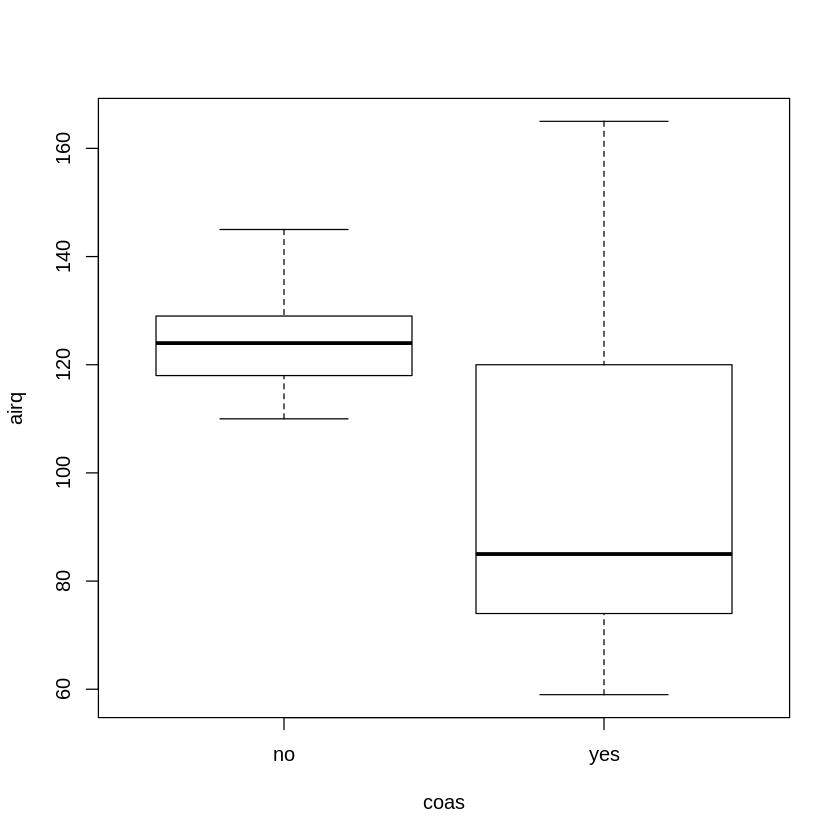

In [32]:
plot(airq~coas, data=Airq)

#### A variável "medi" afeta a qualidade do ar?

In [33]:
m3<-lm(airq~medi, data=Airq)

In [34]:
summary(m3)


Call:
lm(formula = airq ~ medi, data = Airq)

Residuals:
    Min      1Q  Median      3Q     Max 
-49.214 -21.358   5.696  19.247  60.410 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 9.936e+01  6.365e+00  15.609  2.4e-15 ***
medi        5.638e-04  4.102e-04   1.374     0.18    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 27.61 on 28 degrees of freedom
Multiple R-squared:  0.0632,	Adjusted R-squared:  0.02975 
F-statistic: 1.889 on 1 and 28 DF,  p-value: 0.1802


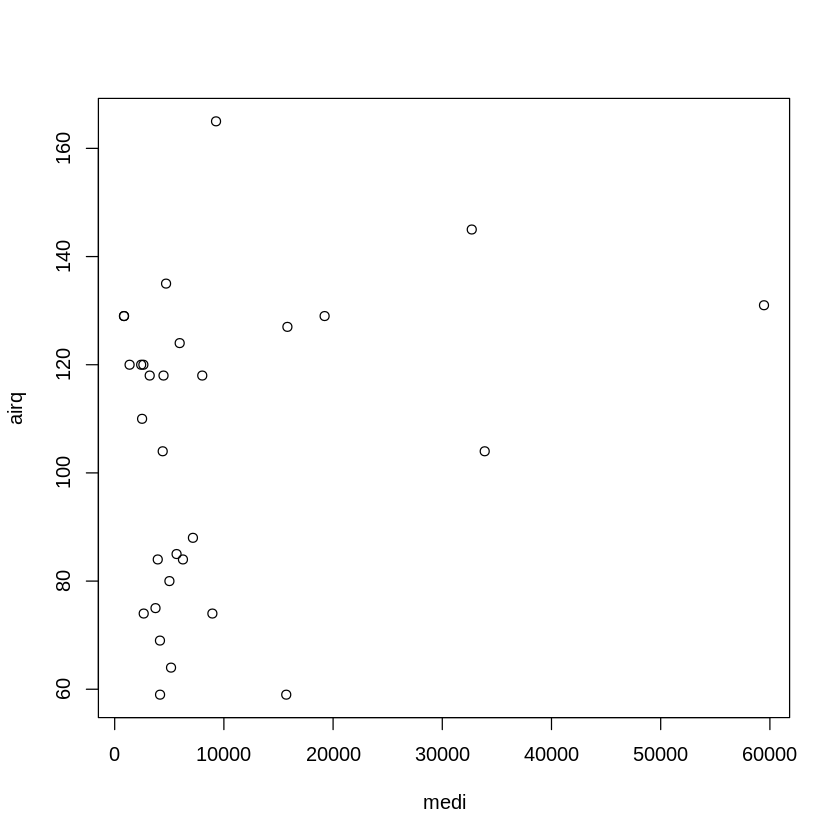

In [35]:
plot(airq~medi, data=Airq)

#### a variável não afetou a qualidade do ar

#### A quantidade de chuva influência na qualidade do ar?

In [36]:
m4<-lm(airq~rain, data=Airq)

In [37]:
summary(m4)


Call:
lm(formula = airq ~ rain, data = Airq)

Residuals:
    Min      1Q  Median      3Q     Max 
-46.648 -24.679   9.367  21.734  60.303 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 106.6662    15.0895   7.069 1.09e-07 ***
rain         -0.0545     0.3926  -0.139    0.891    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 28.51 on 28 degrees of freedom
Multiple R-squared:  0.0006878,	Adjusted R-squared:  -0.035 
F-statistic: 0.01927 on 1 and 28 DF,  p-value: 0.8906


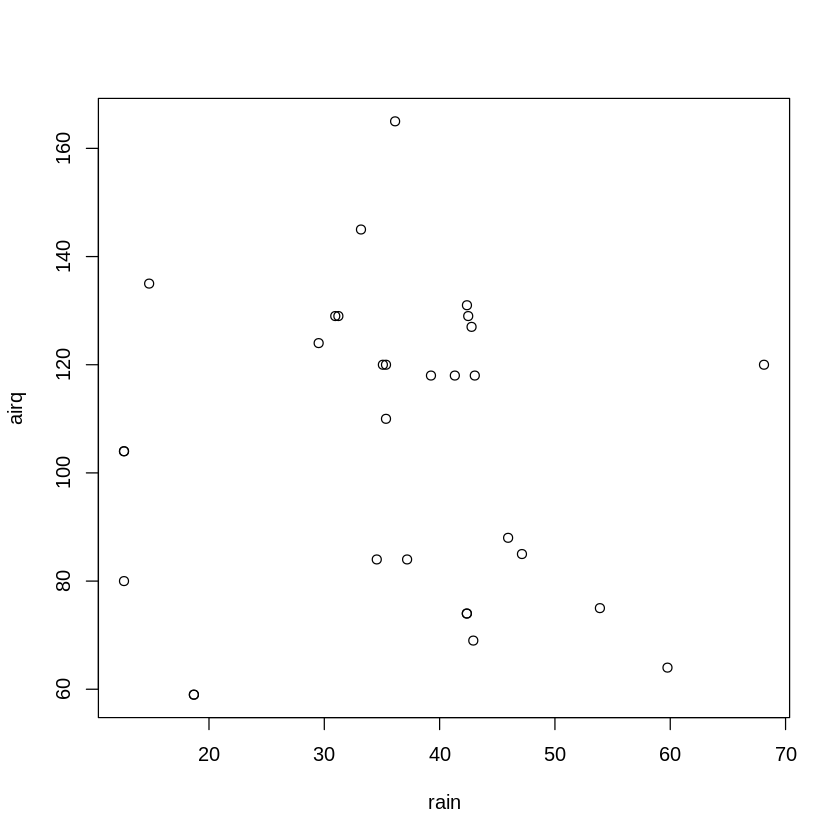

In [38]:
plot(airq~rain, data=Airq)

#### A quantidade de chuva não influência na qualidade do ar

#### A densidade populacional afeta na qualidade do ar?

In [41]:
m5<-lm(airq~dens, data=Airq)

In [42]:
summary(m5)


Call:
lm(formula = airq ~ dens, data = Airq)

Residuals:
    Min      1Q  Median      3Q     Max 
-46.051 -24.248   8.847  22.365  59.937 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  1.054e+02  6.128e+00  17.195   <2e-16 ***
dens        -3.857e-04  1.872e-03  -0.206    0.838    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 28.5 on 28 degrees of freedom
Multiple R-squared:  0.001514,	Adjusted R-squared:  -0.03415 
F-statistic: 0.04246 on 1 and 28 DF,  p-value: 0.8382


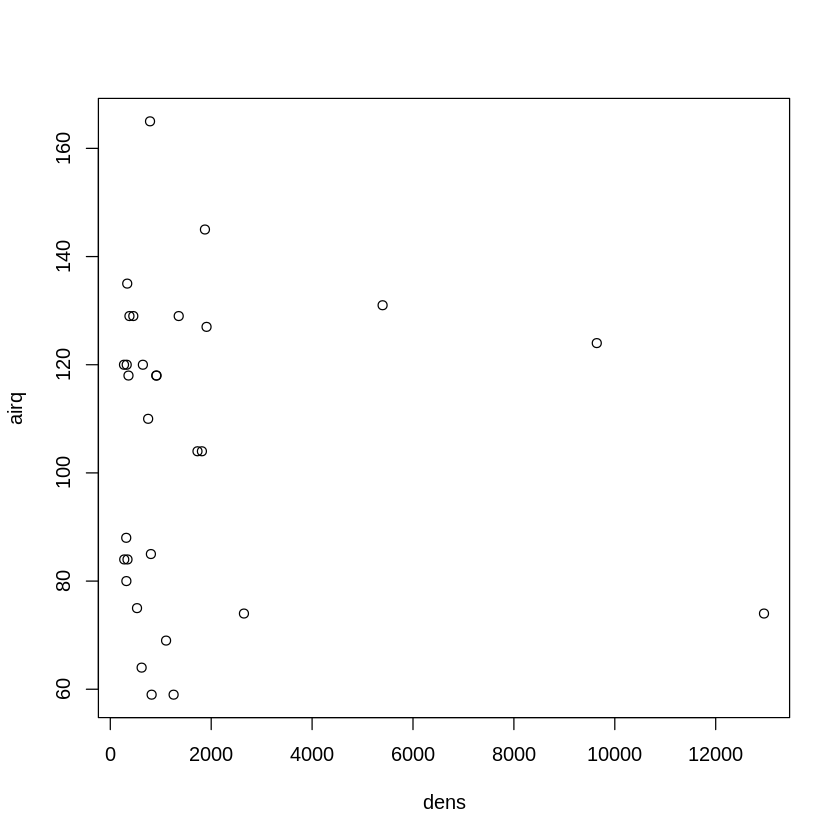

In [44]:
plot(airq~dens, data=Airq)

#### Não existe efeito da densidade populaciona na qualidade do ar

# Retas em modelos não significativos são opcionais nos gráficos

## retas nos gráficos

y=a+b*x
a <- intercepto (onde a reta vai tocar no eixo y)
b <- inclinação da reta

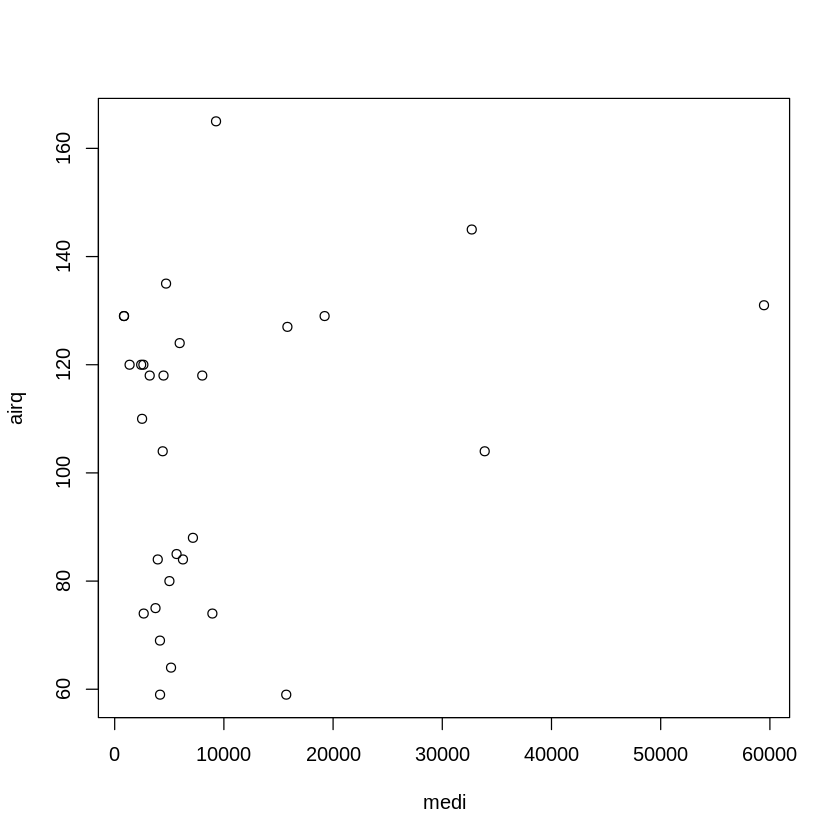

In [51]:
plot(airq~medi, data=Airq)

In [49]:
summary(m3)


Call:
lm(formula = airq ~ medi, data = Airq)

Residuals:
    Min      1Q  Median      3Q     Max 
-49.214 -21.358   5.696  19.247  60.410 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 9.936e+01  6.365e+00  15.609  2.4e-15 ***
medi        5.638e-04  4.102e-04   1.374     0.18    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 27.61 on 28 degrees of freedom
Multiple R-squared:  0.0632,	Adjusted R-squared:  0.02975 
F-statistic: 1.889 on 1 and 28 DF,  p-value: 0.1802


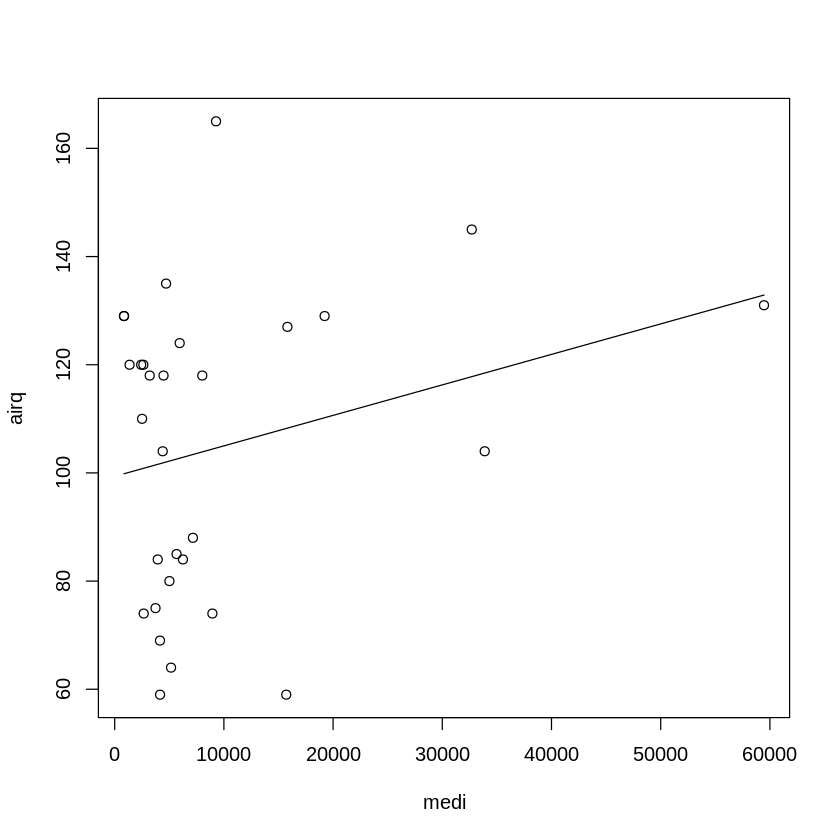

In [53]:
#(Intercept)+medi
plot(airq~medi, data=Airq)
curve(9.936e+01+5.638e-04*x, add=TRUE)

### melhorar o gráfico

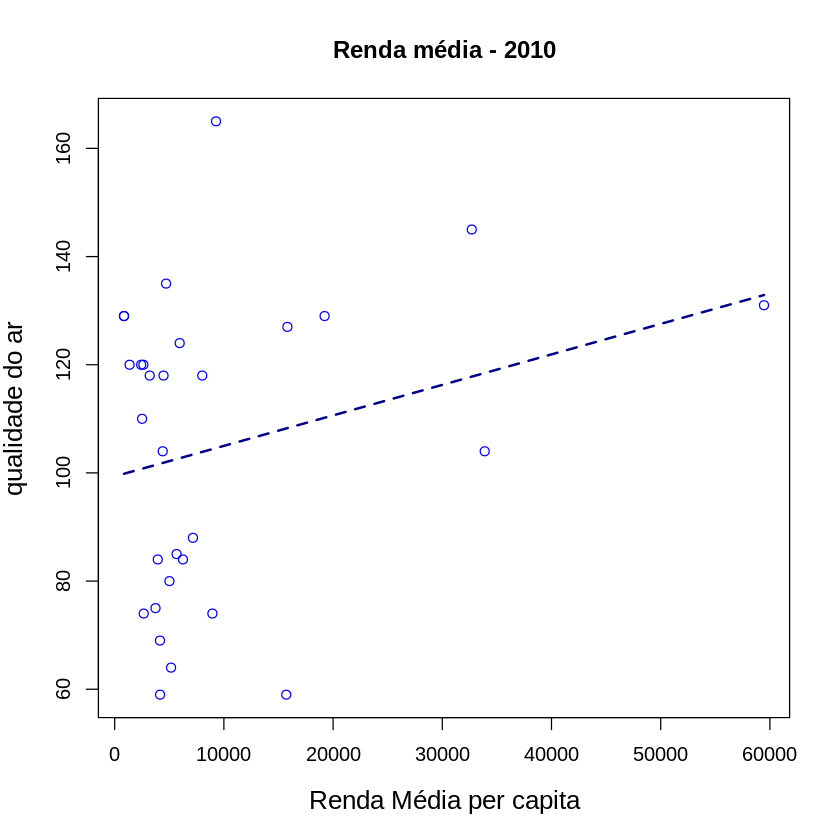

In [62]:
plot(airq~medi, data=Airq, xlab="Renda Média per capita", ylab="qualidade do ar", 
     pch=1, col='blue', cex.lab=1.3, main="Renda média - 2010")
curve(9.936e+01+5.638e-04*x, add=TRUE, col="darkblue", lwd=2, lty=2)

## Regressão múltipla

In [63]:
nRM1<- lm(airq~vala+coas, data=Airq)

In [65]:
summary(nRM1)


Call:
lm(formula = airq ~ vala + coas, data = Airq)

Residuals:
    Min      1Q  Median      3Q     Max 
-36.056 -13.349  -5.879  12.785  69.265 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  1.171e+02  8.717e+00  13.434  1.8e-13 ***
vala         1.999e-03  9.397e-04   2.128  0.04264 *  
coasyes     -2.968e+01  9.336e+00  -3.179  0.00369 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 23.43 on 27 degrees of freedom
Multiple R-squared:  0.3494,	Adjusted R-squared:  0.3012 
F-statistic: 7.249 on 2 and 27 DF,  p-value: 0.003021


#### Existe um efeito da posição costeira e do valor das empresas na qualidade do ar

### Gráfico regressão múltipla

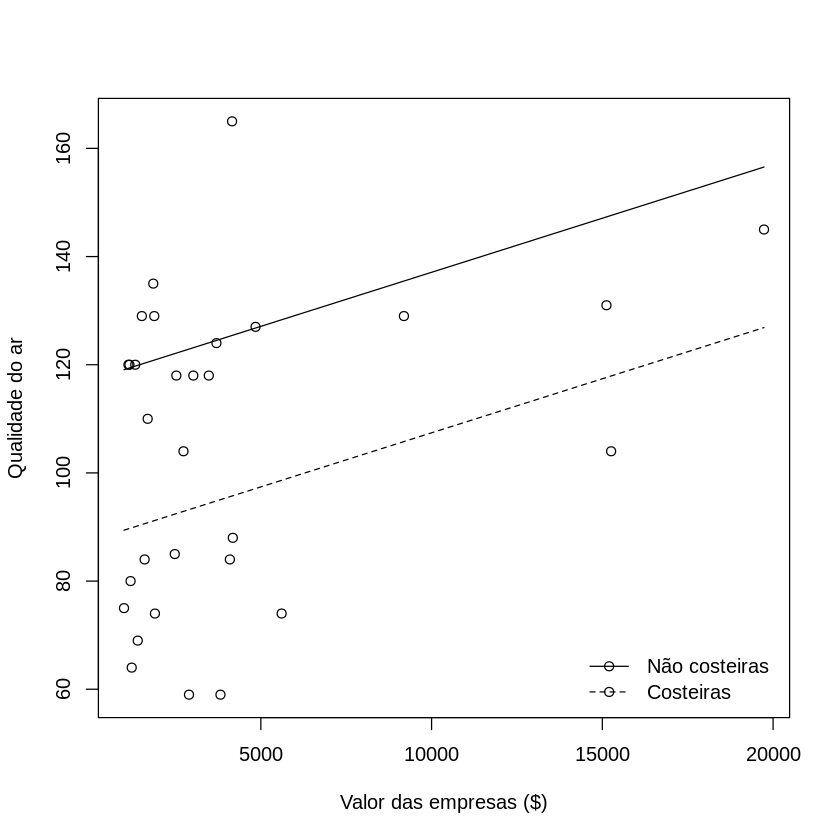

In [71]:
plot(airq~vala, data=Airq, xlab="Valor das empresas ($)", ylab="Qualidade do ar")
curve(1.171e+02+1.999e-03*x, add=TRUE) # Cidade não costeira
curve(1.171e+02+1.999e-03*x-2.968e+01, add=TRUE, lty=2) # Cidade costeira
legend("bottomright", c("Não costeiras","Costeiras"), pch=1, lty=c(1,2), bty="n")

#### A qualidade do ar das cidades é afetada tanto pelo valor das empresas quanto pela posição costeira das cidades quanto pela posição costeira das cidades. Quanto maior o valor das empresas, pior a qualidade do ar das cidades. Além disso as cidades não-costeiras apresentam qualidade do ar pior do que as cidades costeiras.

In [72]:
nRM2<-lm(airq~vala+coas+dens, data=Airq)
summary(nRM2)


Call:
lm(formula = airq ~ vala + coas + dens, data = Airq)

Residuals:
   Min     1Q Median     3Q    Max 
-36.46 -12.83  -6.34  12.70  68.42 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  1.183e+02  9.066e+00  13.046 6.43e-13 ***
vala         2.086e-03  9.638e-04   2.165  0.03977 *  
coasyes     -2.966e+01  9.454e+00  -3.137  0.00421 ** 
dens        -9.005e-04  1.578e-03  -0.571  0.57317    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 23.73 on 26 degrees of freedom
Multiple R-squared:  0.3574,	Adjusted R-squared:  0.2833 
F-statistic:  4.82 on 3 and 26 DF,  p-value: 0.008454
